# Load the Data

In [1]:
import pandas as pd

df = pd.read_csv('Restaurent_reviews.tsv', delimiter='\t', quoting=3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [2]:
df.shape

(1000, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# Preprocess the Data

In [4]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

corpus = []
for i in range(0, 1000): 
    review = re.sub(pattern = '[^a-zA-Z]', repl = " ", string = df['Review'][i]) # Remove noise like special characters, numbers, and extra spaces
    review = review.lower() # Lowercasing
    review_word = review.split() # Tokenization or Splitting
    review_word = [ word for word in review_word if word not in stop_words] # Remove stopwords
    review1 = [lemmatizer.lemmatize(word) for word in review_word] # Lemmatization or Stemming
    review = " ".join(review1)
    corpus.append(review)

In [5]:
corpus[:1000]

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care less interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'also combo like bur

# Generate WordClouds for text data visualization

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

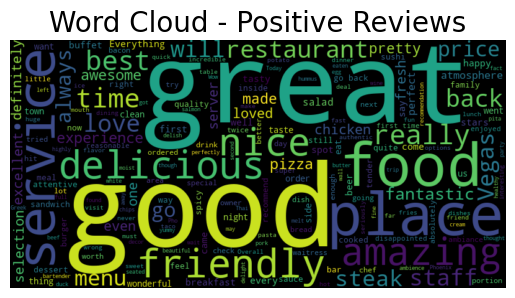

In [7]:
positive_reviews = df[df['Liked'] == 1]['Review'].values
positive_reviews_text = " ".join(positive_reviews)

wordcloud_positive = WordCloud(width=800, height=400).generate(positive_reviews_text)

plt.imshow(wordcloud_positive, interpolation='bilinear') 
plt.title("Word Cloud - Positive Reviews", fontsize=20)
plt.axis("off") 
plt.show()

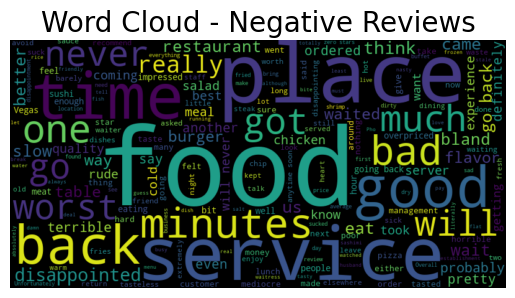

In [8]:
negative_reviews = df[df['Liked'] == 0]['Review'].values
negative_reviews_text = " ".join(negative_reviews)

wordcloud_negative = WordCloud(width=800, height=400).generate(negative_reviews_text)

plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Word Cloud - Negative Reviews", fontsize=20)
plt.axis("off")
plt.show()

# Feature Extraction

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2)) # Using unigram and bigram

In [10]:
X = vectorizer.fit_transform(corpus).toarray()
X.shape

(1000, 5000)

In [11]:
y = df.iloc[:,-1].values
y.shape

(1000,)

# Visualize Sentiment Distribution

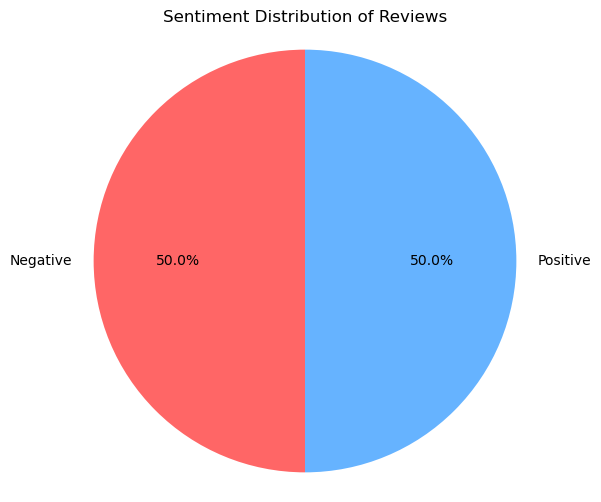

In [12]:
import matplotlib.pyplot as plt

# Assuming y contains the sentiment labels (0 = Negative, 1 = Positive)
sentiment_counts = [sum(y == 0), sum(y == 1)]  # Count of Negative and Positive reviews
labels = ['Negative', 'Positive']

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#66b3ff'])
plt.title('Sentiment Distribution of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

# Split the Data into training and test sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Machine Learning Models

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Classification Report:\n", classification_report(y_test, lr_y_pred))

Logistic Regression Accuracy: 0.735
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.88      0.76        96
           1       0.84      0.61      0.70       104

    accuracy                           0.73       200
   macro avg       0.76      0.74      0.73       200
weighted avg       0.76      0.73      0.73       200



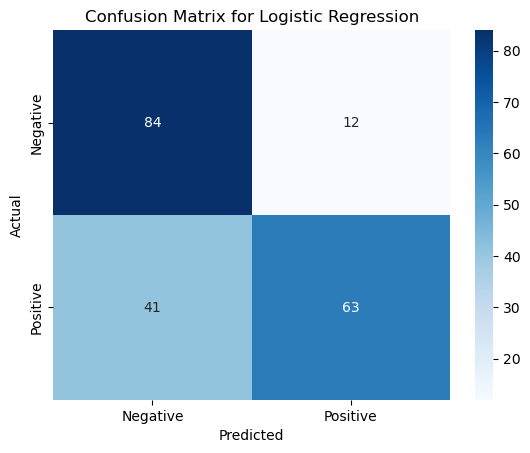

In [16]:
cm = confusion_matrix(y_test, lr_y_pred) # Assuming `y_test` are actual labels and `lr_y_pred` are predictions
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_y_pred))
print("Classification Report:\n", classification_report(y_test, nb_y_pred))

Naive Bayes Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78        96
           1       0.80      0.79      0.80       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



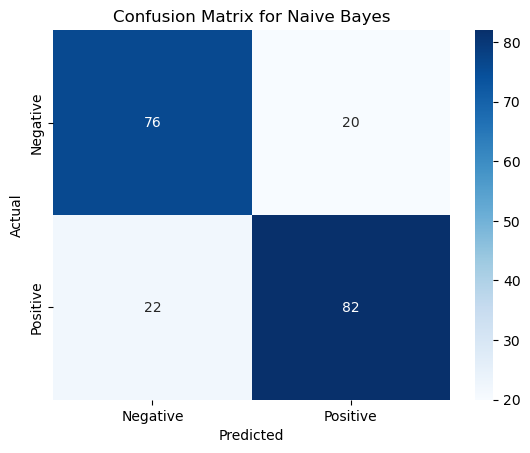

In [18]:
cm = confusion_matrix(y_test, nb_y_pred) # Assuming `y_test` are actual labels and `lr_y_pred` are predictions
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_y_pred))
print("Classification Report:\n", classification_report(y_test, svm_y_pred))

Support Vector Machine Accuracy: 0.735
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        96
           1       0.85      0.60      0.70       104

    accuracy                           0.73       200
   macro avg       0.76      0.74      0.73       200
weighted avg       0.76      0.73      0.73       200



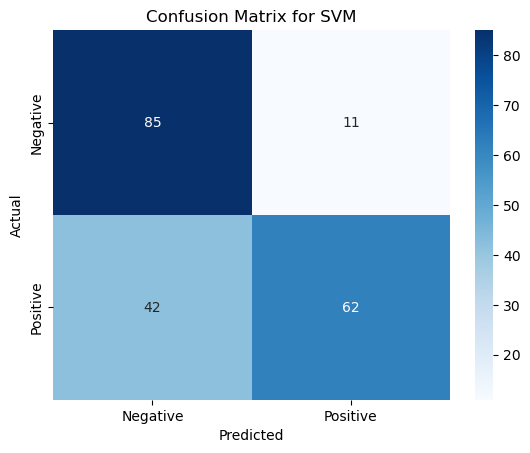

In [20]:
cm = confusion_matrix(y_test, svm_y_pred) # Assuming `y_test` are actual labels and `lr_y_pred` are predictions
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Classification Report:\n", classification_report(y_test, dt_y_pred))

Decision Tree Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.82      0.71        96
           1       0.77      0.55      0.64       104

    accuracy                           0.68       200
   macro avg       0.70      0.69      0.68       200
weighted avg       0.70      0.68      0.67       200



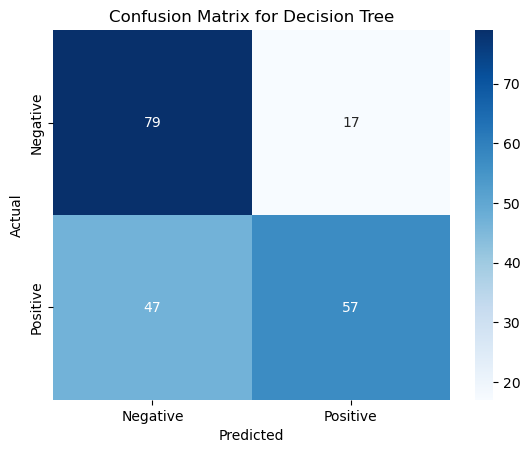

In [22]:
cm = confusion_matrix(y_test, dt_y_pred) # Assuming `y_test` are actual labels and `lr_y_pred` are predictions
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 0.705
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.90      0.74        96
           1       0.85      0.53      0.65       104

    accuracy                           0.70       200
   macro avg       0.74      0.71      0.70       200
weighted avg       0.75      0.70      0.70       200



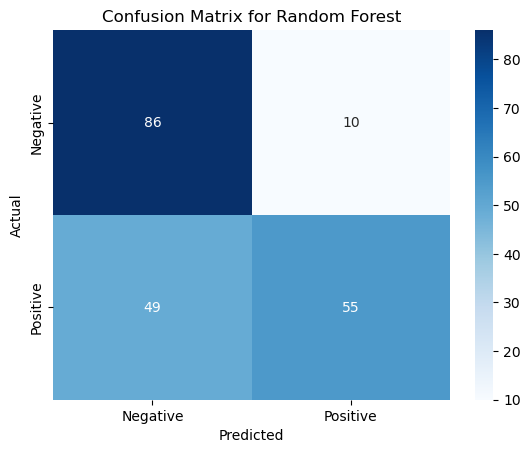

In [24]:
cm = confusion_matrix(y_test, rf_y_pred) # Assuming `y_test` are actual labels and `lr_y_pred` are predictions
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Gradient Boosting (XGBoost)

In [25]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("Classification Report:\n", classification_report(y_test, xgb_y_pred))

XGBoost Accuracy: 0.665
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.80      0.70        96
           1       0.75      0.54      0.63       104

    accuracy                           0.67       200
   macro avg       0.68      0.67      0.66       200
weighted avg       0.68      0.67      0.66       200



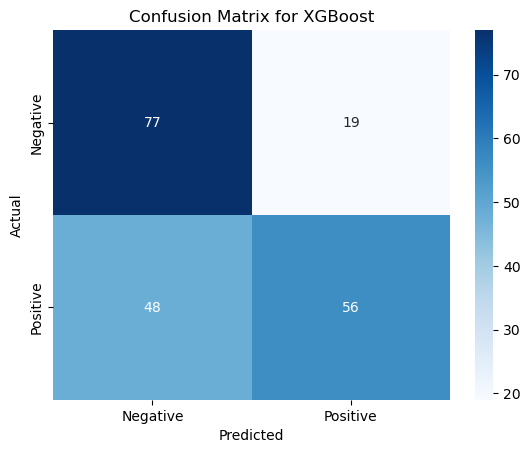

In [26]:
cm = confusion_matrix(y_test, xgb_y_pred) # Assuming `y_test` are actual labels and `lr_y_pred` are predictions
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K-Nearest Neighbors (KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_y_pred))
print("Classification Report:\n", classification_report(y_test, knn_y_pred))

K-Nearest Neighbors Accuracy: 0.705
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.71        96
           1       0.75      0.64      0.69       104

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.70      0.70       200



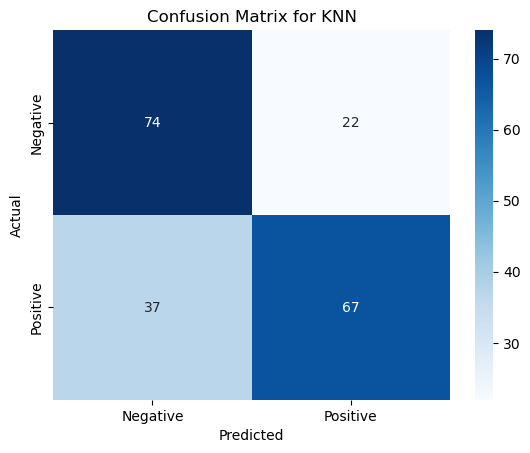

In [28]:
cm = confusion_matrix(y_test, knn_y_pred) # Assuming `y_test` are actual labels and `lr_y_pred` are predictions
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-validation for Model Comparison

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
models = {
    'Logistic Regression': lr_model,
    'Naive Bayes': nb_model,
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'KNN': knn_model
}

print("Cross-validation Results:")
for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5).mean()
    print(f"{name} CV Mean: {cv_score:.2f}")

Cross-validation Results:
Logistic Regression CV Mean: 0.77
Naive Bayes CV Mean: 0.76
SVM CV Mean: 0.77
Decision Tree CV Mean: 0.71
Random Forest CV Mean: 0.73
XGBoost CV Mean: 0.73
KNN CV Mean: 0.72


# Comparison of ROC Curves: Logistic Regression vs Naive Bayes

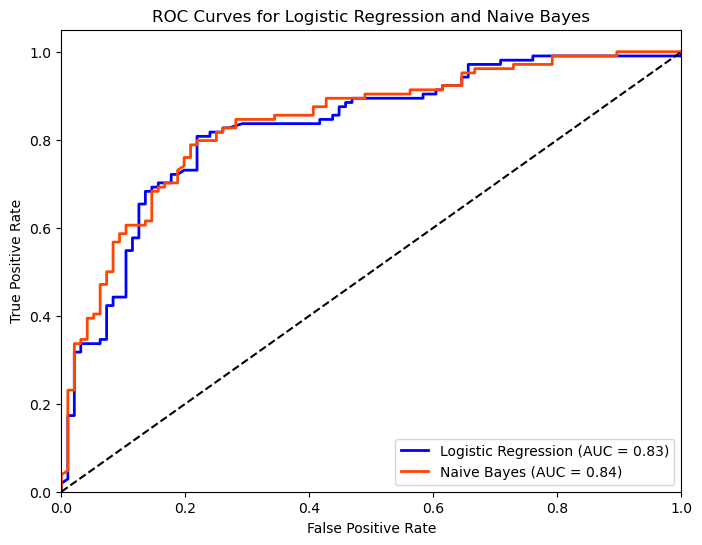

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the test set
lr_y_probs = lr_model.predict_proba(X_test)[:, 1]  # Logistic Regression
nb_y_probs = nb_model.predict_proba(X_test)[:, 1]  # Naive Bayes

# Compute ROC curve for both models
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_probs)

# Compute AUC for both models
lr_roc_auc = auc(lr_fpr, lr_tpr)
nb_roc_auc = auc(nb_fpr, nb_tpr)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, color='#FF4500', lw=2, label=f'Naive Bayes (AUC = {nb_roc_auc:.2f})')

# Plotting the random chance line
plt.plot([0, 1], [0, 1], color='k', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression and Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Example of Sample Reviews with Predicted Sentiment

In [32]:
# Pick a random sample of 5 reviews for demonstration
sample_reviews = df['Review'].sample(5).values

# Predict sentiment using the trained model
predictions = nb_model.predict(vectorizer.transform(sample_reviews))

# Print out reviews with predicted sentiment
for i, review in enumerate(sample_reviews):
    sentiment = "Positive" if predictions[i] == 1 else "Negative"
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 100)

Review: Went for lunch - service was slow.
Predicted Sentiment: Negative
----------------------------------------------------------------------------------------------------
Review: What did bother me, was the slow service.
Predicted Sentiment: Negative
----------------------------------------------------------------------------------------------------
Review: The classic Maine Lobster Roll was fantastic.
Predicted Sentiment: Positive
----------------------------------------------------------------------------------------------------
Review: This is my new fav Vegas buffet spot.
Predicted Sentiment: Positive
----------------------------------------------------------------------------------------------------
Review: And the beans and rice were mediocre at best.
Predicted Sentiment: Negative
----------------------------------------------------------------------------------------------------
